# Preprocessing danych, inżynieria cech i wstępne modelowanie


## 1. wczytanie danych

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [52]:
data = pd.read_csv("../data/our_data.csv")

In [53]:
data.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.275030,-0.048205,-0.104989,-0.078712,0.147527,-0.268389,-0.145985,0.223070,-0.245475,0.054535,...,0.186528,0.041501,-0.242181,-0.107090,0.488465,-0.971117,0.920094,-0.786650,0.244342,0.037616
1,0.265267,-0.039533,-0.055622,-0.153174,0.136032,-0.188985,-0.195430,0.213643,-0.193541,0.291933,...,0.248442,0.352116,0.157372,0.023030,0.457693,0.706198,-0.281509,-0.764021,0.258142,0.050204
2,0.278719,-0.016347,-0.105631,-0.996845,-0.984686,-0.991374,-0.997012,-0.984279,-0.991043,-0.941030,...,0.538921,-0.802863,-0.974110,-0.309165,0.061915,-0.032188,0.330297,-0.608431,-0.160914,-0.071041
3,0.273204,-0.012032,-0.137018,-0.502654,-0.083456,-0.606272,-0.531081,-0.058082,-0.597897,-0.384713,...,0.332548,0.256056,0.030980,0.158134,-0.702547,0.296602,0.464166,-0.845954,0.158648,-0.074060
4,0.279222,-0.005795,-0.092436,-0.996173,-0.969167,-0.980864,-0.996487,-0.969335,-0.978718,-0.939277,...,-0.015343,0.080477,-0.185231,0.010776,-0.255061,0.253623,0.376215,-0.796369,0.213405,-0.065949
5,0.376920,-0.032645,-0.064039,0.289539,0.053635,-0.471835,0.272506,0.016392,-0.492155,0.434334,...,0.419752,-0.567567,-0.846305,-0.582829,0.232542,-0.961077,-0.351361,-0.758606,0.260774,0.055919
6,0.201452,-0.001853,-0.097824,-0.310171,0.085567,0.003675,-0.334213,-0.012717,0.021686,0.190942,...,0.139709,0.023771,-0.321909,0.785811,-0.106120,0.218318,0.243933,-0.828063,0.217010,0.018205
7,0.253857,-0.018867,-0.106338,-0.978236,-0.982791,-0.989215,-0.979191,-0.981098,-0.987429,-0.931253,...,0.200474,-0.393497,-0.773619,0.093570,0.202408,0.046260,0.078579,0.439278,-0.300457,-0.696604
8,0.270431,-0.017142,-0.102501,-0.996208,-0.997446,-0.991789,-0.996763,-0.996878,-0.991797,-0.939951,...,0.450096,-0.316833,-0.525245,-0.033310,0.062593,0.125413,0.049282,-0.082511,-0.321670,-0.408151
9,0.275434,-0.009838,-0.104469,-0.996053,-0.974574,-0.986158,-0.996657,-0.976143,-0.986471,-0.941855,...,0.544750,-0.535775,-0.747393,-0.012382,0.086768,-0.369068,0.662941,-0.798128,0.037706,-0.115616


## 2. preprocessing 

Nasze dane są już znormalizowane oraz nie ma danych kategorycznych, zatem tymi krokami nie musimy się zajmować.

## 3. feature selection

Przypomnienie kolumn:
- tBodyAcc-XYZ
- tBodyAccJerk-XYZ
- tBodyAccMag
- tBodyAccJerkMag
- tGravityAcc-XYZ
- tGravityAccMag
- tBodyGyro-XYZ
- tBodyGyroJerk-XYZ
- tBodyGyroMag
- tBodyGyroJerkMag 

- fBodyAcc-XYZ
- fBodyAccJerk-XYZ
- fBodyAccMag
- fBodyAccJerkMag
- fBodyGyro-XYZ
- fBodyGyroMag
- fBodyGyroJerkMag

Przedrostek 't': sygnał w domenie czasu, 'f': sygnał w domenie częstotliwości po tranformacji fouriera (był wzór poprzednio, przekształca funckje czasową w funkcję częstotliwości).

Dla każdego sygnału mamy dane następujące statystyki:
- max()
- mad() - mediana odchylenia bezwzględnego
- min()
- kurtosis() - jedna z miar kształtu rozkładu częstotliwości sygnału 
- bandsEnergy() - energia przedziału częstotliwości w przedziałach FFT każdego okna
- mean()
- meanFreq()
- arCoeff() - współczynnik autoregresji
- entropy() - entropia sygnału, średnia ilość informacji przypadająca na pojedynczą wiadomość ze źródła
- iqr() - $Q_3 - Q_1 $
- sma() - obszar wielkości sygnału
- std()
- maxInds - indeks składowej częstotliwości o największej wartości
- skewness()
- energy()
- correlation()

Powinniśmy się zatem skupić na tym dla jakich sygnałów ważna będzie informacja w domenie czasowej, częstotliwości albo w obu domenach oraz jakie statystyki chcemy z tych sygnałów analizować.

In [54]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,...,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000
mean,0.274103,-0.017655,-0.108947,-0.607123,-0.509124,-0.612027,-0.632903,-0.524808,-0.614074,-0.466417,...,0.127117,-0.297867,-0.616229,0.006829,0.004443,0.018603,-0.011860,-0.498934,0.064577,-0.052189
std,0.066910,0.036158,0.052625,0.438765,0.500023,0.403949,0.413571,0.483662,0.399073,0.538331,...,0.244383,0.322860,0.312029,0.336948,0.447195,0.619526,0.488777,0.507037,0.305688,0.267176
min,-1.000000,-0.684893,-1.000000,-0.999897,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.995100,-1.000000,-1.000000,-0.980143
25%,0.262541,-0.024813,-0.121268,-0.992363,-0.976572,-0.978808,-0.993300,-0.976516,-0.978755,-0.935811,...,-0.017198,-0.538592,-0.842712,-0.124403,-0.282621,-0.498327,-0.399412,-0.816076,0.005303,-0.127309
50%,0.277126,-0.017161,-0.108596,-0.942089,-0.829841,-0.848572,-0.947026,-0.839508,-0.843087,-0.874812,...,0.136506,-0.334090,-0.703422,0.008115,0.008280,0.021011,-0.010695,-0.715126,0.184443,-0.002696
75%,0.288451,-0.010595,-0.097618,-0.250242,-0.056243,-0.277974,-0.300119,-0.085257,-0.287795,-0.014697,...,0.287357,-0.109512,-0.486867,0.149005,0.290676,0.540897,0.369579,-0.523540,0.251357,0.103462
max,0.680266,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,1.000000,1.000000,1.000000,0.999756,1.000000


### 3.1 Selekcja cech

In [55]:
data.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.275030,-0.048205,-0.104989,-0.078712,0.147527,-0.268389,-0.145985,0.223070,-0.245475,0.054535,...,0.186528,0.041501,-0.242181,-0.107090,0.488465,-0.971117,0.920094,-0.786650,0.244342,0.037616
1,0.265267,-0.039533,-0.055622,-0.153174,0.136032,-0.188985,-0.195430,0.213643,-0.193541,0.291933,...,0.248442,0.352116,0.157372,0.023030,0.457693,0.706198,-0.281509,-0.764021,0.258142,0.050204
2,0.278719,-0.016347,-0.105631,-0.996845,-0.984686,-0.991374,-0.997012,-0.984279,-0.991043,-0.941030,...,0.538921,-0.802863,-0.974110,-0.309165,0.061915,-0.032188,0.330297,-0.608431,-0.160914,-0.071041
3,0.273204,-0.012032,-0.137018,-0.502654,-0.083456,-0.606272,-0.531081,-0.058082,-0.597897,-0.384713,...,0.332548,0.256056,0.030980,0.158134,-0.702547,0.296602,0.464166,-0.845954,0.158648,-0.074060
4,0.279222,-0.005795,-0.092436,-0.996173,-0.969167,-0.980864,-0.996487,-0.969335,-0.978718,-0.939277,...,-0.015343,0.080477,-0.185231,0.010776,-0.255061,0.253623,0.376215,-0.796369,0.213405,-0.065949
5,0.376920,-0.032645,-0.064039,0.289539,0.053635,-0.471835,0.272506,0.016392,-0.492155,0.434334,...,0.419752,-0.567567,-0.846305,-0.582829,0.232542,-0.961077,-0.351361,-0.758606,0.260774,0.055919
6,0.201452,-0.001853,-0.097824,-0.310171,0.085567,0.003675,-0.334213,-0.012717,0.021686,0.190942,...,0.139709,0.023771,-0.321909,0.785811,-0.106120,0.218318,0.243933,-0.828063,0.217010,0.018205
7,0.253857,-0.018867,-0.106338,-0.978236,-0.982791,-0.989215,-0.979191,-0.981098,-0.987429,-0.931253,...,0.200474,-0.393497,-0.773619,0.093570,0.202408,0.046260,0.078579,0.439278,-0.300457,-0.696604
8,0.270431,-0.017142,-0.102501,-0.996208,-0.997446,-0.991789,-0.996763,-0.996878,-0.991797,-0.939951,...,0.450096,-0.316833,-0.525245,-0.033310,0.062593,0.125413,0.049282,-0.082511,-0.321670,-0.408151
9,0.275434,-0.009838,-0.104469,-0.996053,-0.974574,-0.986158,-0.996657,-0.976143,-0.986471,-0.941855,...,0.544750,-0.535775,-0.747393,-0.012382,0.086768,-0.369068,0.662941,-0.798128,0.037706,-0.115616


### 3.2 Usuwanie kolum o wysokiej korelacji

In [56]:
corr_matrix = data.corr().abs()
high_corr = []
to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i,j] > .98:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            corr = corr_matrix.iloc[i,j]
            high_corr.append((col1, col2, corr))
            to_drop.add(col2)

In [57]:
print(len(high_corr))
print(len(to_drop))

490
214


In [58]:
print("Columns with correlation > 0.98:")
for i in range(10):
    print(high_corr[i][0], "<->", high_corr[i][1], ":", high_corr[i][2])

Columns with correlation > 0.98:
tBodyAcc-std()-X <-> tBodyAcc-mad()-X : 0.9986583826041019
tBodyAcc-std()-X <-> tBodyAcc-max()-X : 0.9813349790087165
tBodyAcc-std()-X <-> tBodyAcc-iqr()-X : 0.980538781941804
tBodyAcc-std()-X <-> fBodyAcc-mean()-X : 0.9882906005305381
tBodyAcc-std()-X <-> fBodyAcc-std()-X : 0.9985553892662831
tBodyAcc-std()-X <-> fBodyAcc-mad()-X : 0.9918135148879706
tBodyAcc-std()-Y <-> tBodyAcc-mad()-Y : 0.9975125754269467
tBodyAcc-std()-Y <-> fBodyAcc-mean()-Y : 0.9903787923200028
tBodyAcc-std()-Y <-> fBodyAcc-std()-Y : 0.9976646187981076
tBodyAcc-std()-Y <-> fBodyAcc-mad()-Y : 0.994792961527018


In [59]:
data_reduced = data.drop(to_drop, axis=1)
print("whole data: " + str(data.shape))
print("reduced data: " + str(data_reduced.shape))

whole data: (8239, 561)
reduced data: (8239, 347)


In [60]:
data = data_reduced

## 4. Modelowanie

### 4.1 `PCA`

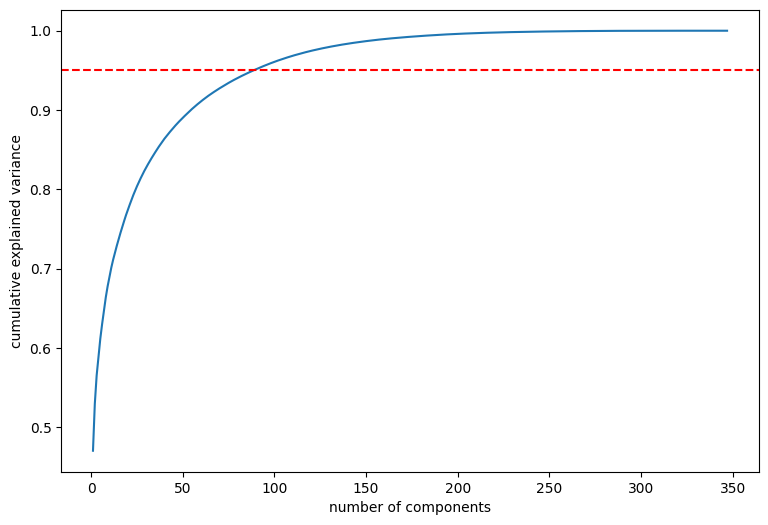

In [61]:
from sklearn.decomposition  import PCA

pca = PCA().fit(data)

plt.figure(figsize=(9,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=.95, color='r', linestyle='--')

In [62]:
pca = PCA(n_components=0.95) #zachowujemy 95% wariancji
data_pca = pca.fit_transform(data)
data = pd.DataFrame(data_pca)

In [63]:
data_pca.shape

(8239, 89)

In [64]:
from sklearn.manifold import TSNE

def plot_scatter(X, y):
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=y)
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    
tSNE = TSNE(random_state=42, verbose=1)
data_tsne = tSNE.fit_transform(data)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8239 samples in 0.004s...
[t-SNE] Computed neighbors for 8239 samples in 0.404s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8239
[t-SNE] Computed conditional probabilities for sample 2000 / 8239
[t-SNE] Computed conditional probabilities for sample 3000 / 8239
[t-SNE] Computed conditional probabilities for sample 4000 / 8239
[t-SNE] Computed conditional probabilities for sample 5000 / 8239
[t-SNE] Computed conditional probabilities for sample 6000 / 8239
[t-SNE] Computed conditional probabilities for sample 7000 / 8239
[t-SNE] Computed conditional probabilities for sample 8000 / 8239
[t-SNE] Computed conditional probabilities for sample 8239 / 8239
[t-SNE] Mean sigma: 1.116745
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.730721
[t-SNE] KL divergence after 1000 iterations: 1.675514


### 4.2 `KMeans`

In [65]:
from sklearn.cluster import KMeans

#### 4.2.1 metoda łokcia

In [66]:
def count_wcss_scores(X, k_max):
    #  WCSS = within-cluster sum of squares
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1 # score returns -WCSS
        scores.append(wcss)
    return scores

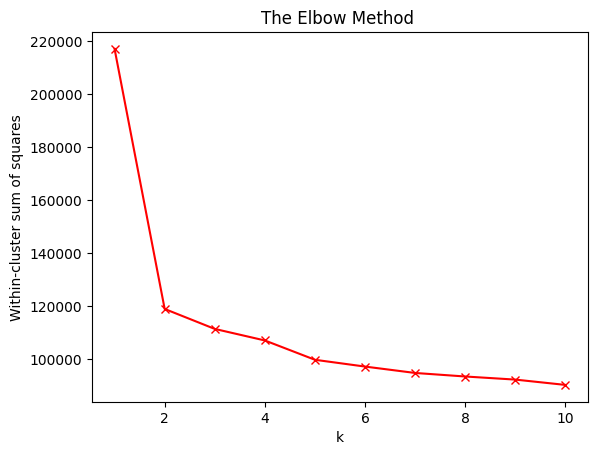

In [67]:
wcss_vec = count_wcss_scores(data, 10)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, 'rx-')
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method ')
plt.show()

>trudno dokladnie określić optymalną liczbę klastrów - kandydaci: 2

#### 4.2.2 metoda silhouette

In [68]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

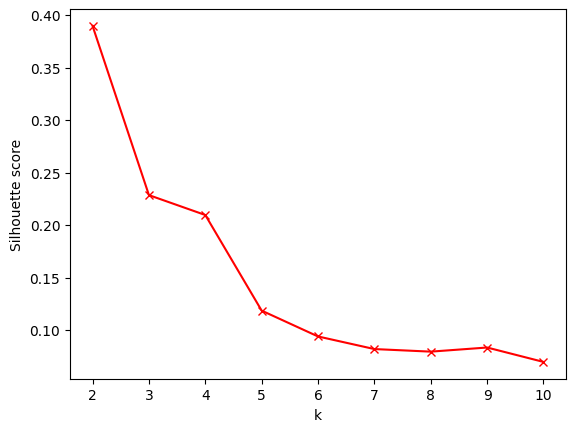

In [69]:
from sklearn.metrics import silhouette_score

cluster_num_seq = range(2, 11) # Niektóre metryki nie działają gdy mamy tylko jeden klaster
silhouette_vec = count_clustering_scores(data, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

>(chcemy jak najwieksze silhouette score) 
zatem kandydaci to: 2

#### 4.2.3 Calinski - Harabasz

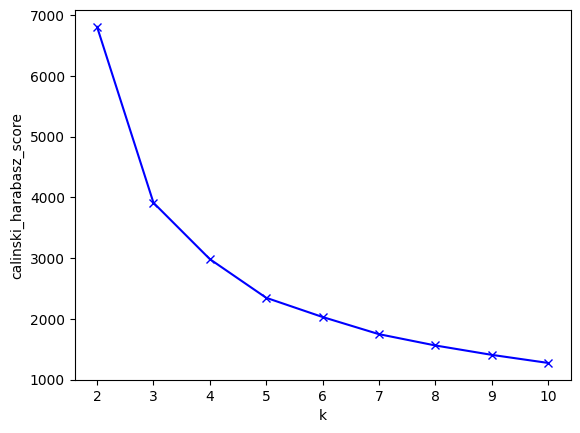

In [70]:
from sklearn.metrics import calinski_harabasz_score
cluster_num_seq = range(2, 11) # Niektóre metryki nie działają gdy mamy tylko jeden klaster
calinski_vec = count_clustering_scores(data, cluster_num_seq, KMeans, calinski_harabasz_score)
plt.plot(cluster_num_seq, calinski_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('calinski_harabasz_score')
plt.show()

>kandydat: 2

#### 4.2.4 davies bouldin

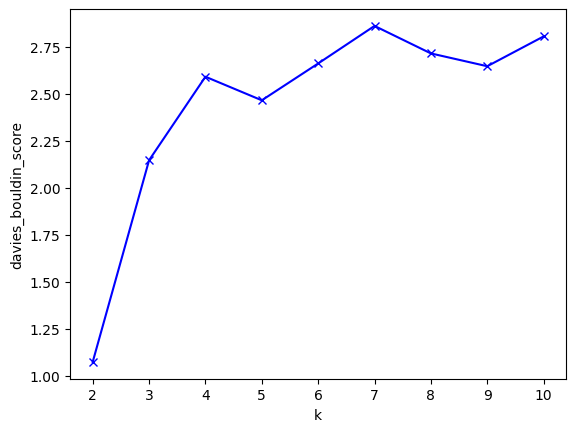

In [71]:
#davies_bouldin_score
from sklearn.metrics import davies_bouldin_score
cluster_num_seq = range(2, 11) 
davies_bouldin_vec = count_clustering_scores(data, cluster_num_seq, KMeans, davies_bouldin_score)
plt.plot(cluster_num_seq, davies_bouldin_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('davies_bouldin_score')
plt.show()


>kandydaci: 2, 5, 9

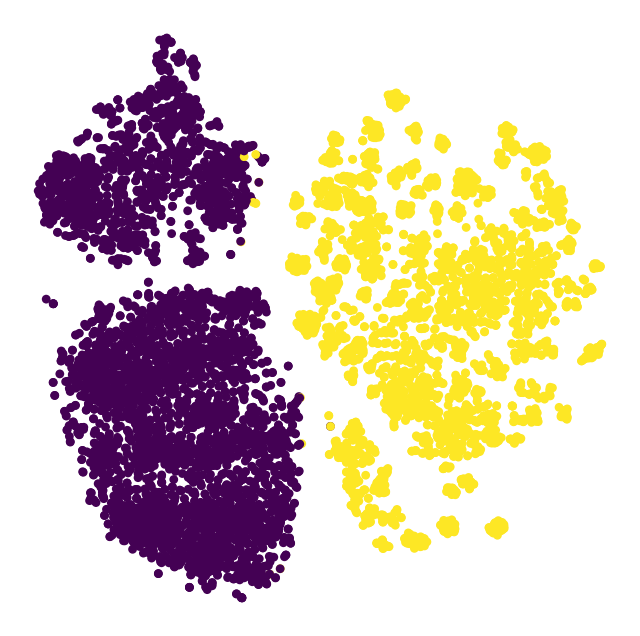

In [72]:
# k means for 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)
plot_scatter(data_tsne, y_kmeans)

<AxesSubplot: xlabel='0'>

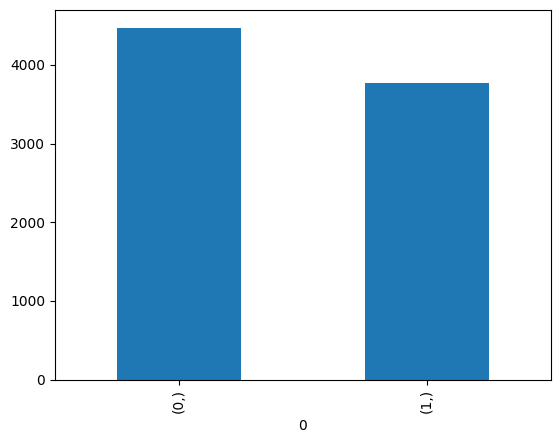

In [73]:
pd.DataFrame(y_kmeans).value_counts().plot(kind='bar')

### 4.3 KMedoids i GMM

In [74]:
from sklearn_extra.cluster import KMedoids

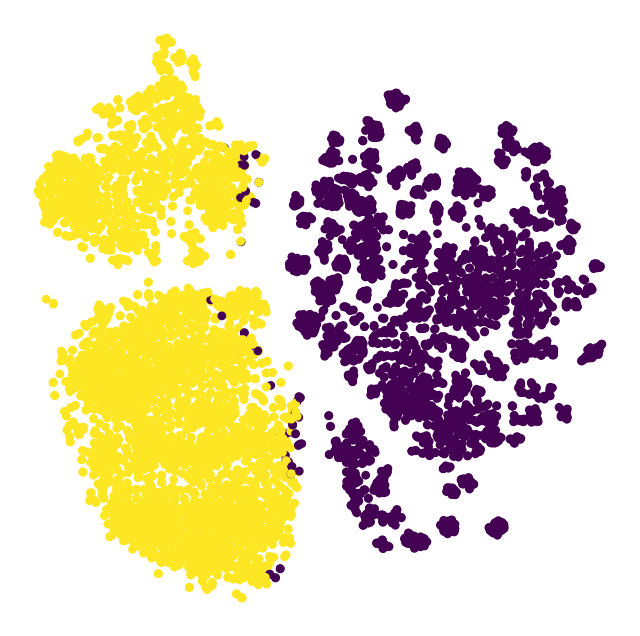

In [75]:
kmedoids = KMedoids(n_clusters=2, random_state=0)
kmedoids.fit(data)
y_kmedoids = kmedoids.predict(data)
plot_scatter(data_tsne, y_kmedoids)

In [76]:
from sklearn.mixture import GaussianMixture

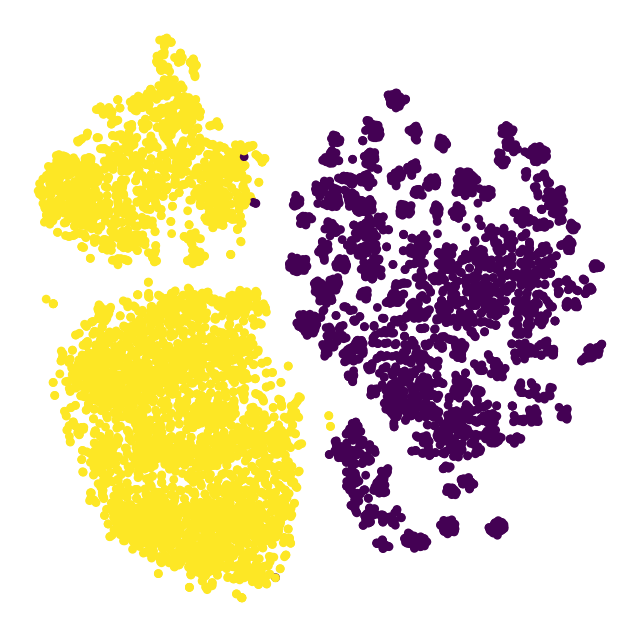

In [77]:
gmm = GaussianMixture(n_components=2)
y_gmm = gmm.fit_predict(data)

plot_scatter(data_tsne, y_gmm)

Bardzo podobne rezultaty jak KMeans.

### 4.3 `DBSCAN`

#### 4.4.1 optymalne eps

[1.23593803 1.23593803 1.26135427 ... 5.04817907 5.05830053 5.31243982]


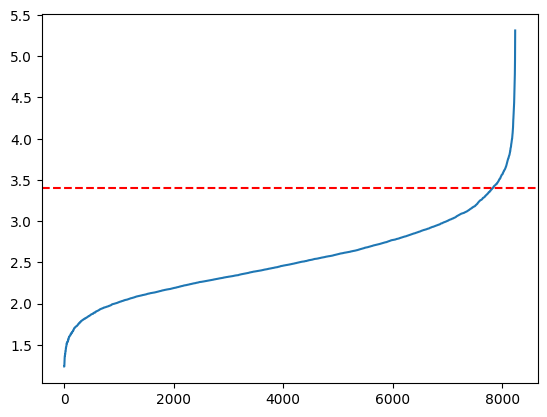

In [78]:
#knee method
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(data)
distances, indices = nearest_neighbors.kneighbors(data)
distances = np.sort(distances, axis=0)[:, 1]
print(distances)
plt.plot(distances)
plt.axhline(y=3.4, color='r', linestyle='--')
plt.show()

>optymalne eps = 3.4

#### 4.4.2 Szukanie optymalnego min_samples

In [79]:
from sklearn.cluster import DBSCAN


min_samples_seq = range(1, 40)
silhouette = []
calinski = []
davies = []
n_clusters = []

for min_samples in min_samples_seq:
    dbscan = DBSCAN(eps=3.4, min_samples=min_samples, n_jobs=-1)
    y_dbscan = dbscan.fit_predict(data)
    silhouette.append(silhouette_score(data, y_dbscan))
    calinski.append(calinski_harabasz_score(data, y_dbscan))
    davies.append(davies_bouldin_score(data, y_dbscan))
    n_clusters.append(len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0))

# into dataframe
res = pd.DataFrame({'min_samples': min_samples_seq, 'silhouette': silhouette, 'calinski': calinski, 'davies': davies, 'n_clusters': n_clusters})



print(res)


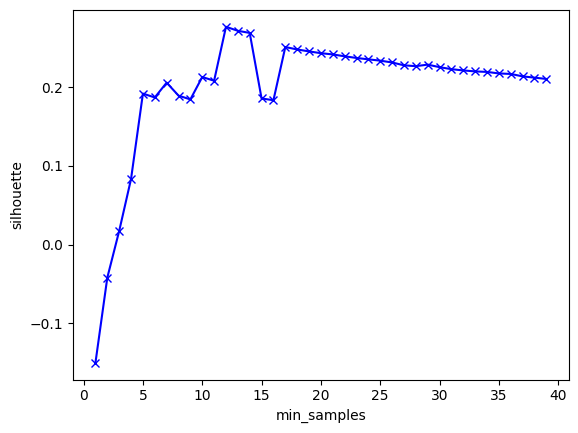

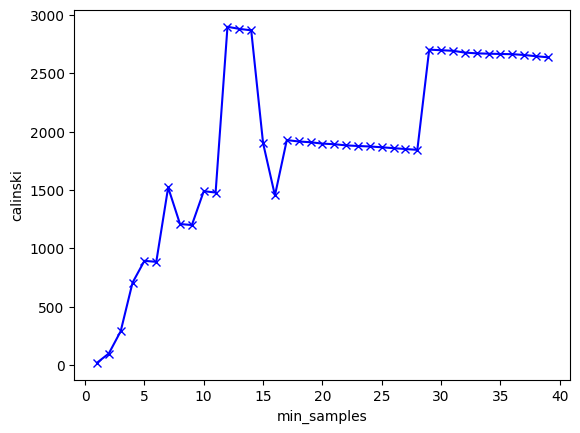

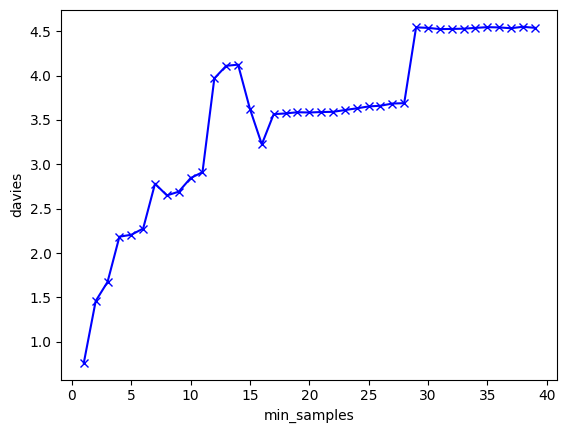

In [ ]:
for col in ['silhouette', 'calinski', 'davies']:
    plt.plot(res['min_samples'], res[col], 'bx-')
    plt.xlabel('min_samples')
    plt.ylabel(col)
    plt.show()

> ile tu wybrać???

<AxesSubplot: xlabel='0'>

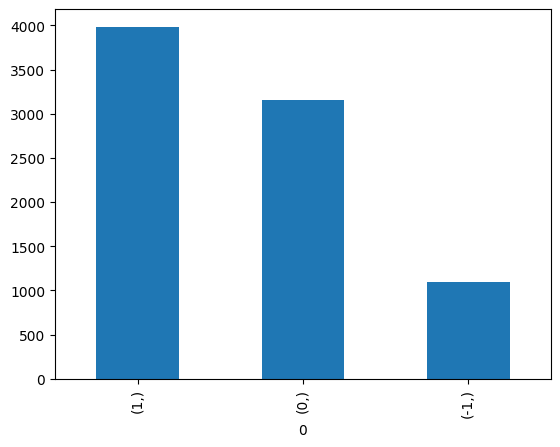

In [ ]:
#min_samples = 24
dbscan = DBSCAN(eps=3.4, min_samples=12, n_jobs=-1)
y_dbscan = dbscan.fit_predict(data)
# interactive 3dplot plotly
import plotly.express as px

fig = px.scatter_3d(x=data[0], y=data[2], z=data[1], color = y_dbscan, title="With outliers", color_continuous_scale='viridis')
fig.show()

#without outliers
y_dbscan_without_outliers = y_dbscan[y_dbscan != -1]
fig = px.scatter_3d(x=data[0][y_dbscan != -1], y=data[2][y_dbscan != -1], z=data[1][y_dbscan != -1], color = y_dbscan_without_outliers, title="Without outliers", color_continuous_scale='tropic')
fig.show()

plt.show()
pd.DataFrame(y_dbscan).value_counts().plot(kind='bar')

>odrzucamy az 1000 wyników - trochę słabo?

### 4.5 `aglomerative clustering`

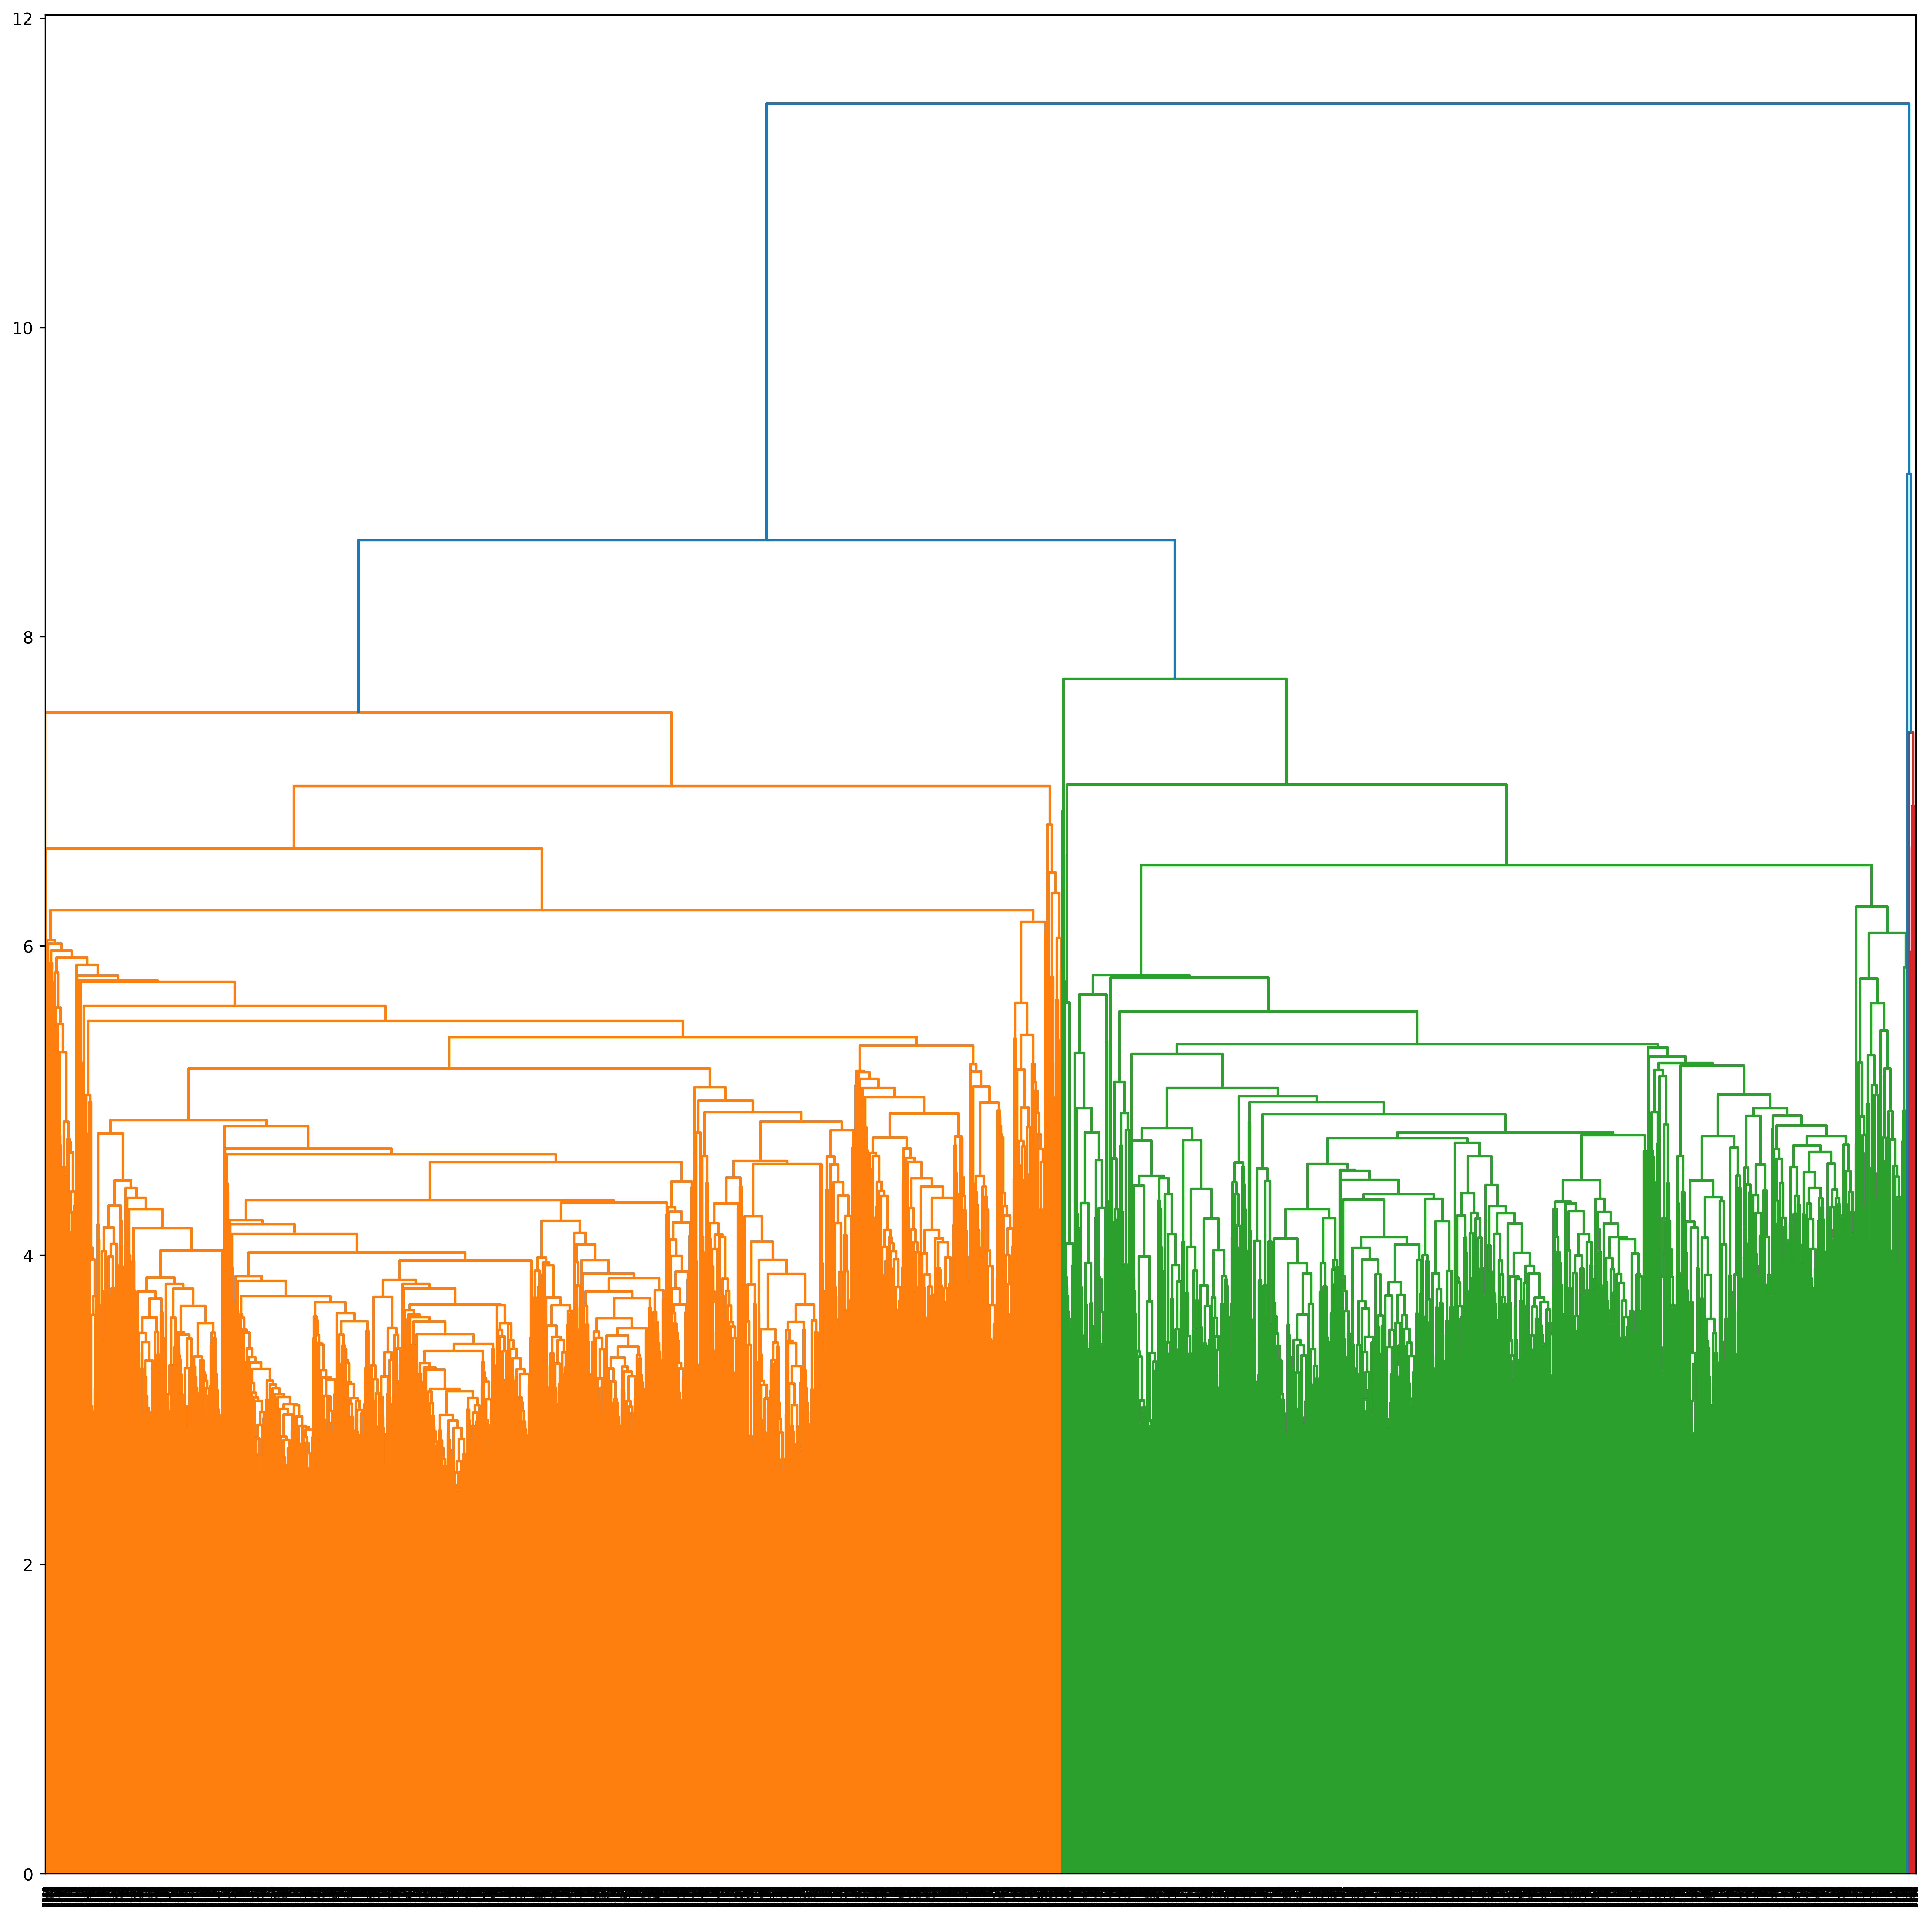

In [ ]:
#aglomerative
from scipy.cluster import hierarchy

Z = hierarchy.linkage(data, method='average')
plt.figure(figsize=(20, 20), dpi= 400, facecolor='w', edgecolor='k')
hierarchy.dendrogram(Z, )
plt.show()


nie no super to wyglada...

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=None, linkage='average', distance_threshold=4)
y_agglo = model.fit_predict(data)

#scores
print("Silhouette score: ", silhouette_score(data, y_agglo))
print("Calinski harabasz score: ", calinski_harabasz_score(data, y_agglo))
print("Davies bouldin score: ", davies_bouldin_score(data, y_agglo))

Silhouette score:  0.057036032521264976
Calinski harabasz score:  33.26470585201751
Davies bouldin score:  1.4195042946164587
